In [1]:
!pip install imbalanced-learn


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,
    roc_auc_score, roc_curve, precision_recall_curve
)

from imblearn.over_sampling import SMOTE


In [4]:
df = pd.read_csv("creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
print(df.shape)
print(df.isnull().sum())
print(df['Class'].value_counts())


(17918, 31)
Time      0
V1        0
V2        0
V3        0
V4        0
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64
Class
0.0    17836
1.0       81
Name: count, dtype: int64


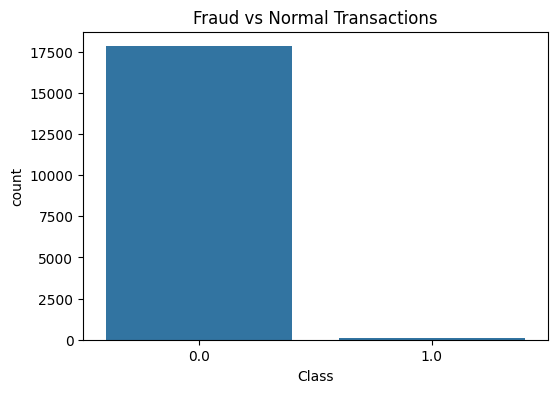

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Normal Transactions")
plt.show()


In [20]:
scaler = StandardScaler()
df[['Time', 'Amount']] = scaler.fit_transform(df[['Time', 'Amount']])

In [8]:
X = df.drop('Class', axis=1)
y = df['Class']


In [10]:
df.dropna(subset=['Class'], inplace=True)
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [11]:
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_sm.value_counts())


Before SMOTE: Class
0.0    13376
1.0       61
Name: count, dtype: int64
After SMOTE: Class
0.0    13376
1.0    13376
Name: count, dtype: int64


In [12]:
models = {
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis()
}


In [13]:
def evaluate_model(model, X_test, y_test, y_pred, y_prob, model_name):
    print(f"\n📌 {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_prob))

    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



📌 Naive Bayes
Accuracy: 0.9763392857142857
Precision: 0.1532258064516129
Recall: 0.95
F1-score: 0.2638888888888889
ROC-AUC: 0.9914181614349776

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      4460
         1.0       0.15      0.95      0.26        20

    accuracy                           0.98      4480
   macro avg       0.58      0.96      0.63      4480
weighted avg       1.00      0.98      0.98      4480



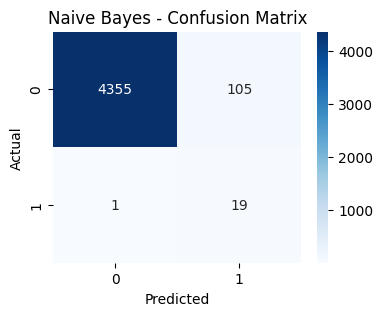


📌 LDA
Accuracy: 0.978125
Precision: 0.16379310344827586
Recall: 0.95
F1-score: 0.27941176470588236
ROC-AUC: 0.9969955156950673

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      4460
         1.0       0.16      0.95      0.28        20

    accuracy                           0.98      4480
   macro avg       0.58      0.96      0.63      4480
weighted avg       1.00      0.98      0.99      4480



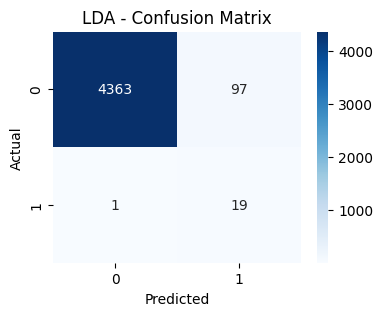

/usr/local/lib/python3.12/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(



📌 QDA
Accuracy: 0.9966517857142857
Precision: 0.5862068965517241
Recall: 0.85
F1-score: 0.6938775510204082
ROC-AUC: 0.9332735426008968

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4460
         1.0       0.59      0.85      0.69        20

    accuracy                           1.00      4480
   macro avg       0.79      0.92      0.85      4480
weighted avg       1.00      1.00      1.00      4480



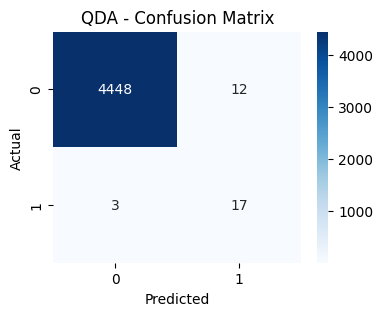

In [14]:
results = []

for name, model in models.items():
    model.fit(X_train_sm, y_train_sm)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    evaluate_model(model, X_test, y_test, y_pred, y_prob, name)

    results.append([
        name,
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred),
        roc_auc_score(y_test, y_prob)
    ])


In [15]:
results_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC"]
)

results_df


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Naive Bayes,0.976339,0.153226,0.95,0.263889,0.991418
1,LDA,0.978125,0.163793,0.95,0.279412,0.996996
2,QDA,0.996652,0.586207,0.85,0.693878,0.933274


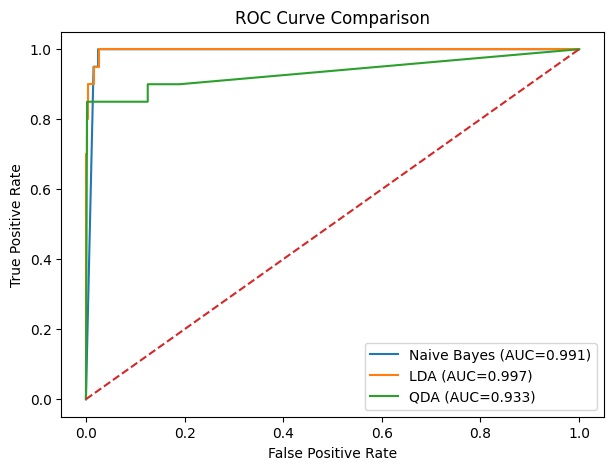

In [16]:
plt.figure(figsize=(7,5))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


In [17]:
import joblib

best_model = models["LDA"]   # change based on your results
joblib.dump(best_model, "fraud_detection_model.pkl")


['fraud_detection_model.pkl']

In [21]:
def predict_transaction(input_data, model):
    input_df = pd.DataFrame([input_data], columns=X.columns)
    # Transform both 'Time' and 'Amount' using the single scaler
    input_df[['Time', 'Amount']] = scaler.transform(input_df[['Time', 'Amount']])

    prediction = model.predict(input_df)[0]
    probability = model.predict_proba(input_df)[0][1]

    return prediction, probability

In [23]:
sample_transaction = X_test.iloc[0].values
pred, prob = predict_transaction(sample_transaction, best_model)

print("Fraud Prediction:", pred)
print("Fraud Probability:", prob)

Fraud Prediction: 0.0
Fraud Probability: 7.247679406268593e-07


In [24]:
from sklearn.utils.class_weight import compute_class_weight

weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)

class_weights = {0: weights[0], 1: weights[1]}


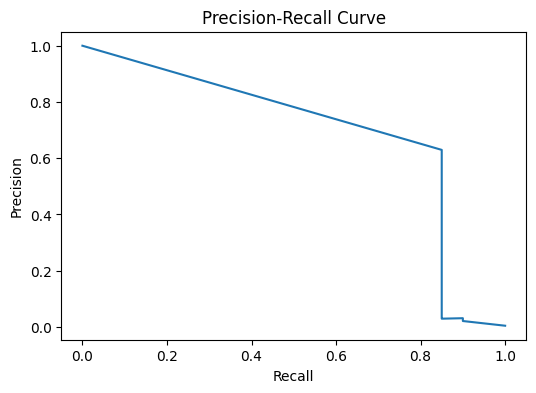

In [25]:
plt.figure(figsize=(6,4))
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [26]:
print("Class-wise mean:\n", X_train_sm.groupby(y_train_sm).mean())


Class-wise mean:
            Time        V1        V2        V3        V4        V5        V6  \
Class                                                                         
0.0   -0.009666 -0.197275  0.219630   0.84527  0.256306 -0.114984  0.116434   
1.0    0.296621 -8.797050  6.586198 -12.66740  6.269602 -6.322185 -2.602469   

             V7        V8        V9  ...       V20       V21       V22  \
Class                                ...                                 
0.0   -0.109632 -0.008332  0.748283  ...  0.030941 -0.054582 -0.145010   
1.0   -8.663635  4.620929 -2.931681  ...  0.795525  0.537212 -0.431494   

            V23       V24       V25       V26       V27       V28    Amount  
Class                                                                        
0.0   -0.033742  0.014449  0.117651  0.036076  0.005669  0.007708  0.001190  
1.0   -0.266429 -0.257071  0.360615  0.211507  0.944090  0.087362  0.051894  

[2 rows x 30 columns]


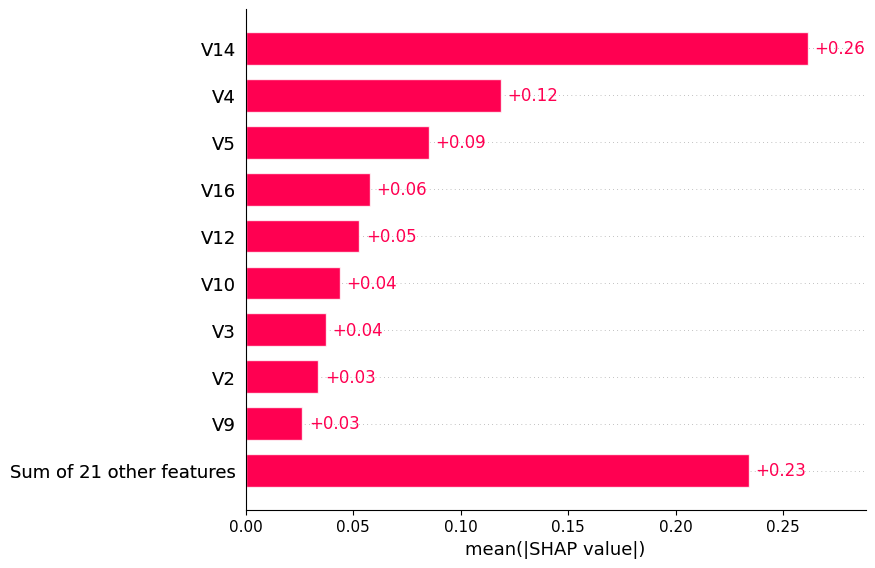

In [27]:
import shap

explainer = shap.Explainer(best_model.predict_proba, X_train_sm)
shap_values = explainer(X_test[:100])

shap.plots.bar(shap_values[:,:,1])


In [28]:
threshold = 0.3   # instead of default 0.5
y_custom = (y_prob >= threshold).astype(int)


In [29]:
import time

for i in range(5):
    txn = X_test.iloc[i].values
    pred, prob = predict_transaction(txn, best_model)
    print(f"Txn {i} → Fraud: {pred}, Risk Score: {prob:.2f}")
    time.sleep(1)


Txn 0 → Fraud: 0.0, Risk Score: 0.00
Txn 1 → Fraud: 0.0, Risk Score: 0.00
Txn 2 → Fraud: 0.0, Risk Score: 0.00
Txn 3 → Fraud: 0.0, Risk Score: 0.00
Txn 4 → Fraud: 0.0, Risk Score: 0.01


In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df['Time'] = scaler.fit_transform(df[['Time']])


In [31]:
import joblib

joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']